In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas
from IPython.display import display

In [12]:
adult_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Adult.csv")
compas_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Compas.csv")
bank_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Bank.csv")
german_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data German.csv")

for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"]
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    df["Accuracy Diff"] = df["Accuracy - Unprivileged"] - df["Accuracy - Privileged"]
    df["False Omission Rate Diff"] = df["False Omission Rate - Unprivileged"] - df["False Omission Rate - Privileged"]
    df["False Discovery Rate Diff"] = df["False Discovery Rate - Unprivileged"] - df["False Discovery Rate - Privileged"]
    df["Statistical Parity Diff"] = df["Base Rate - Unprivileged"] - df["Base Rate - Privileged"]
    df["F1 Score Diff"] = df["F1 Score - Unprivileged"] - df["F1 Score - Privileged"]
    df.drop('Theil Index', axis=1, inplace=True)
    df.drop('Consistency', axis=1, inplace=True)
    for metric in df.columns:
        if "Num" in metric:
            df.drop(metric, axis=1, inplace=True)

In [3]:
def num_interventions(name):
    if name == "Logistic Regression" or name  == "Meta Classifier":
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3

In [4]:
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df["Adult"]):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
print(no_int)
print(one_int)
print(two_int)
print(three_int)

['Logistic Regression']
['RW', 'DIR', 'EGR', 'GSR', 'PR', 'CEOP', 'ROC', 'EOP']
['RW + EGR', 'RW + GSR', 'RW + PR', 'RW + CEOP', 'RW + ROC', 'RW + EOP', 'DIR + EGR', 'DIR + GSR', 'DIR + PR', 'DIR + CEOP', 'DIR + ROC', 'DIR + EOP', 'EGR + CEOP', 'EGR + ROC', 'EGR + EOP', 'GSR + CEOP', 'GSR + ROC', 'GSR + EOP', 'PR + CEOP', 'PR + ROC', 'PR + EOP']
['RW + EGR + CEOP', 'RW + EGR + ROC', 'RW + EGR + EOP', 'RW + GSR + CEOP', 'RW + GSR + ROC', 'RW + GSR + EOP', 'RW + PR + CEOP', 'RW + PR + ROC', 'RW + PR + EOP', 'DIR + EGR + CEOP', 'DIR + EGR + ROC', 'DIR + EGR + EOP', 'DIR + GSR + CEOP', 'DIR + GSR + ROC', 'DIR + GSR + EOP', 'DIR + PR + CEOP', 'DIR + PR + ROC', 'DIR + PR + EOP']


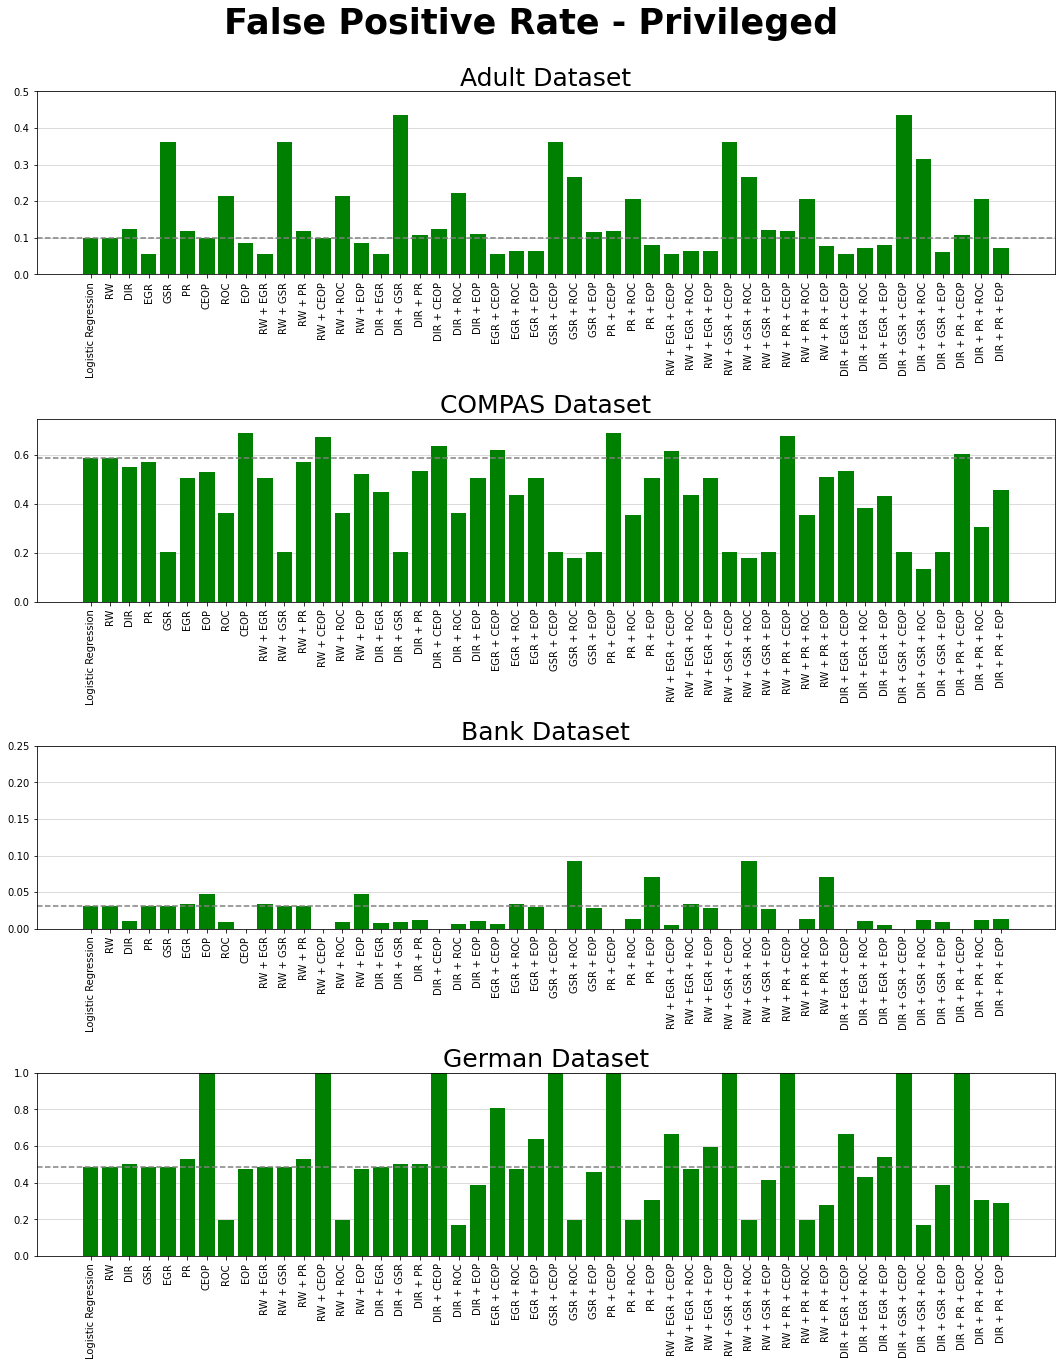

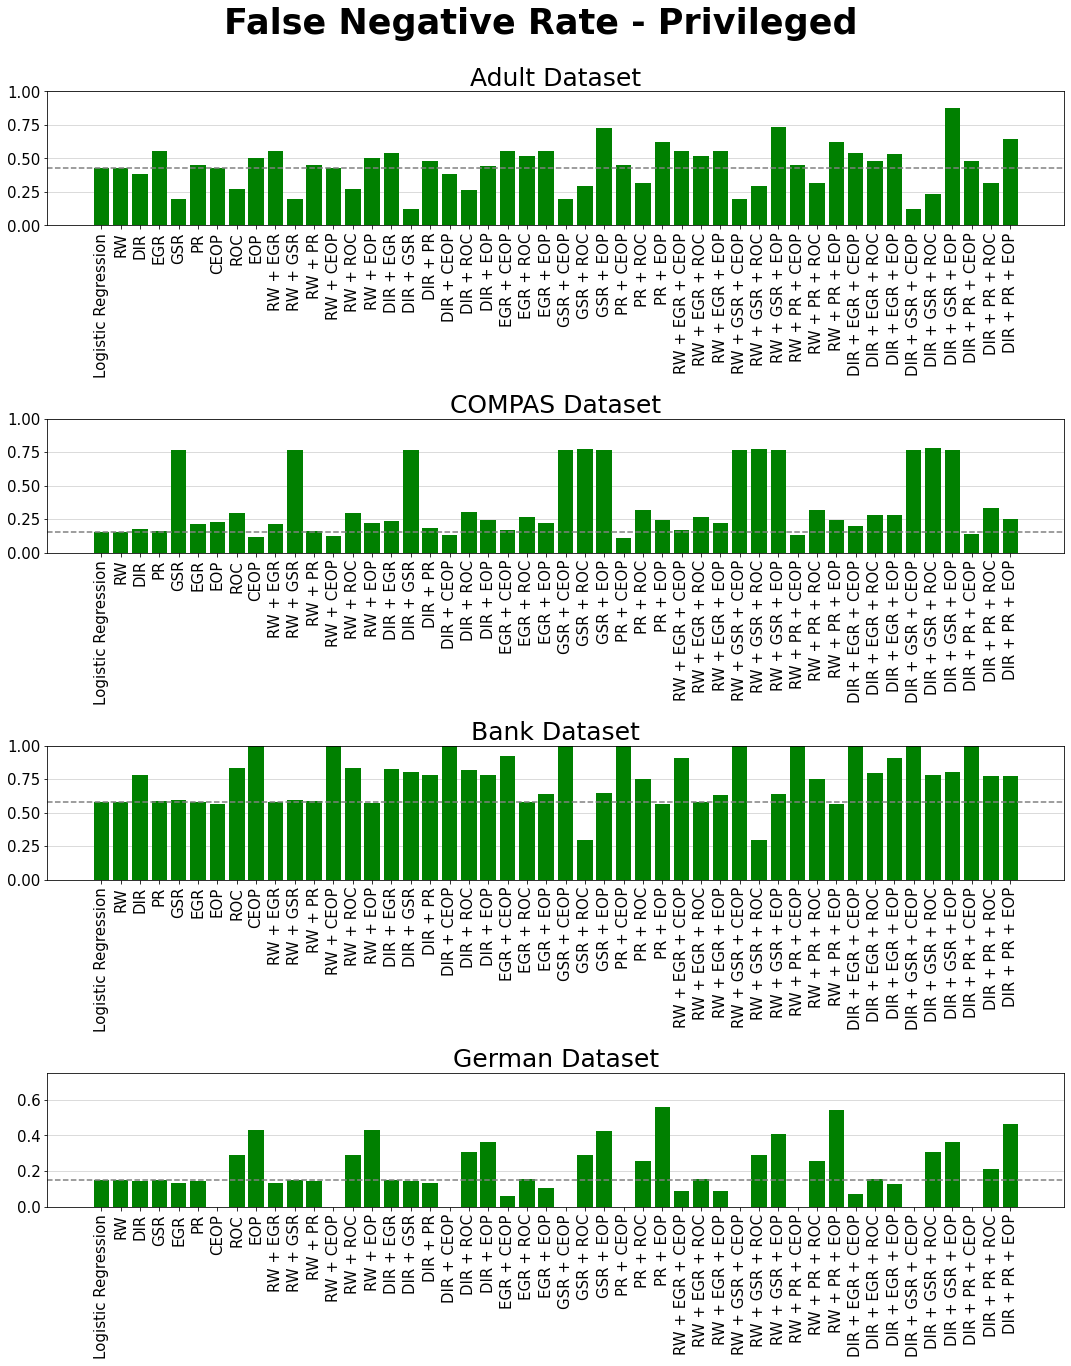

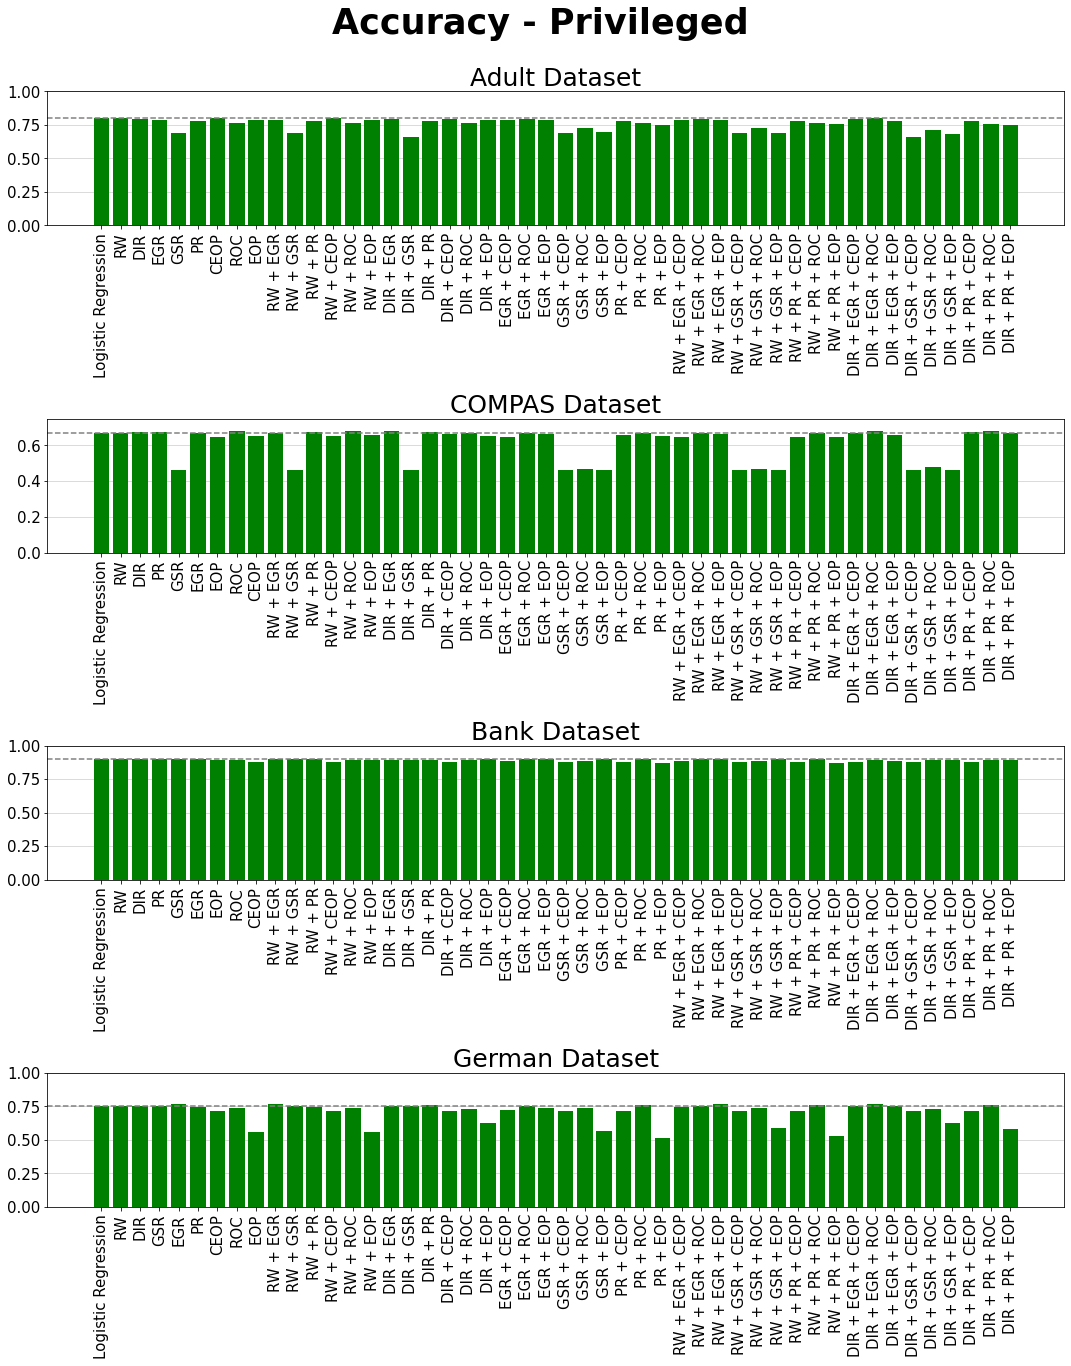

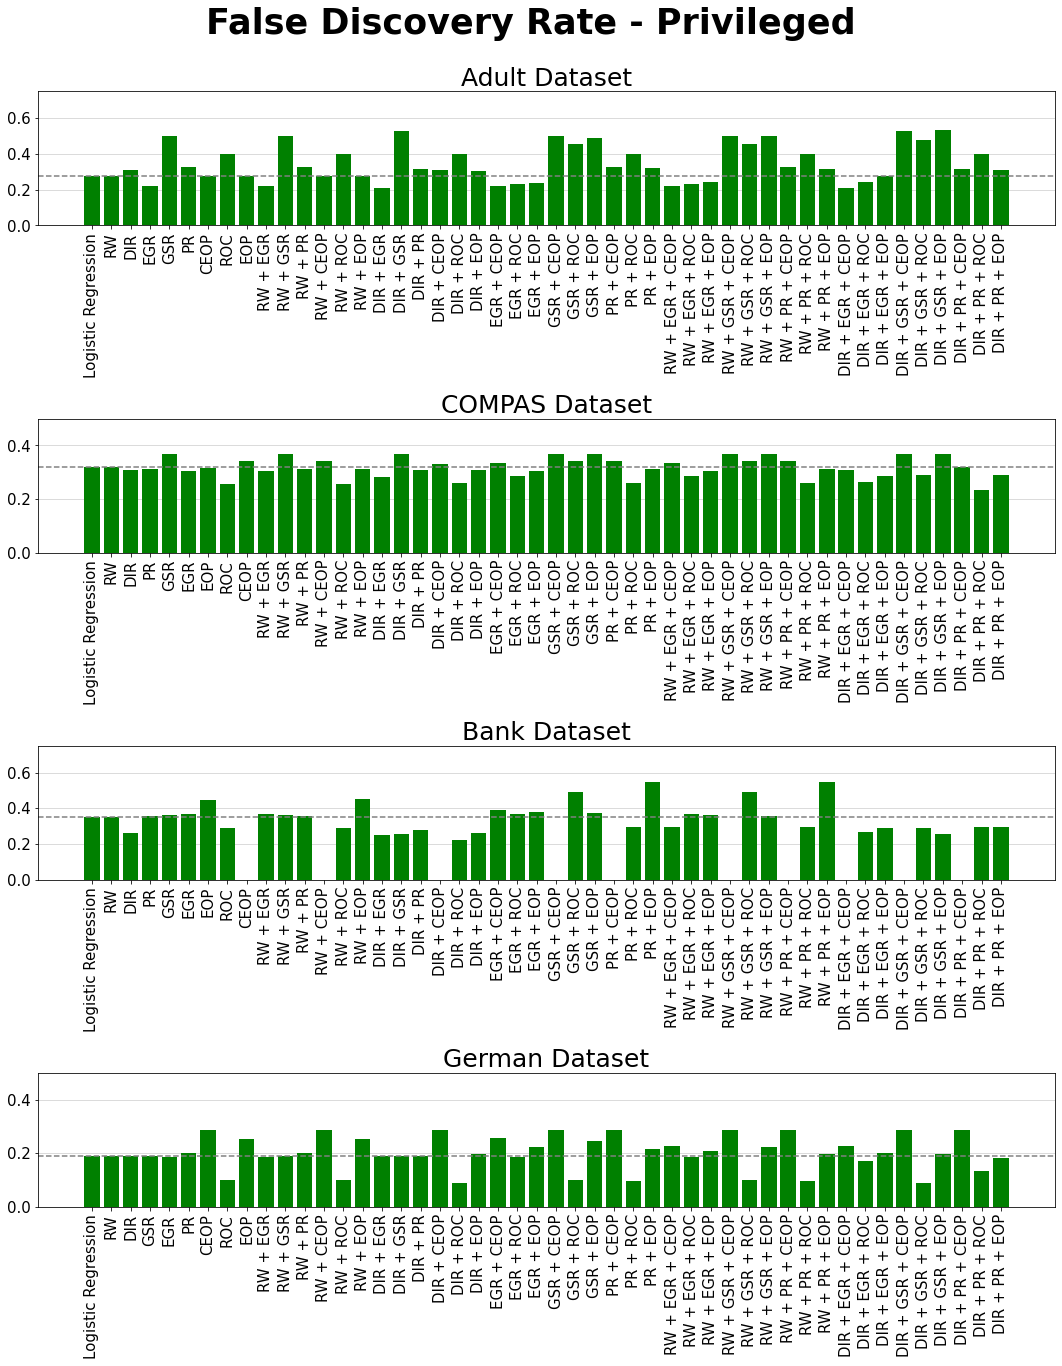

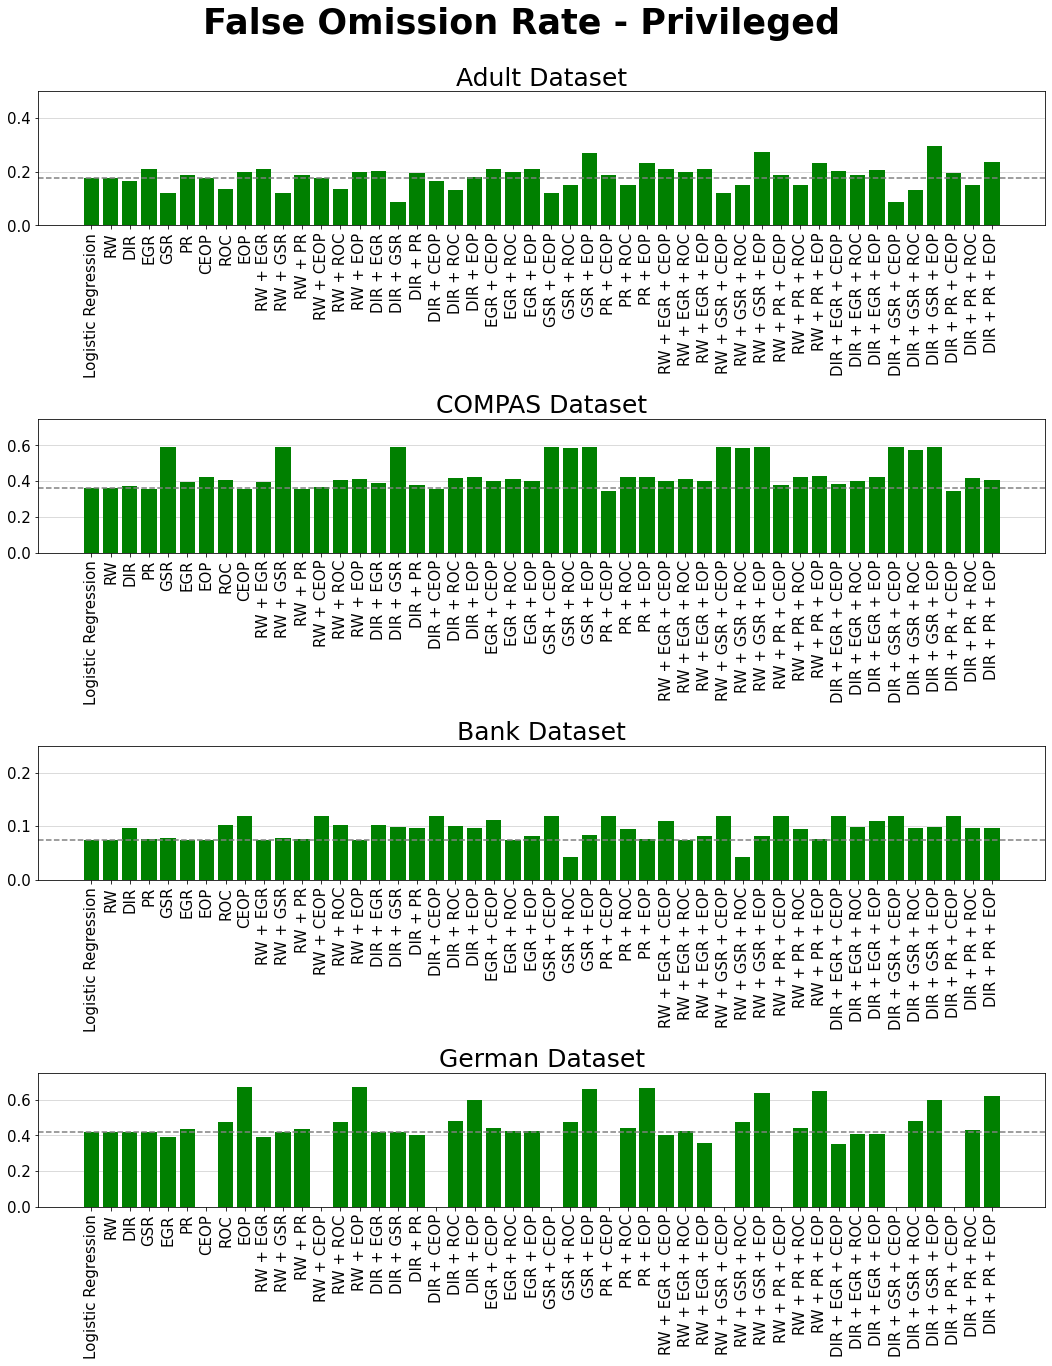

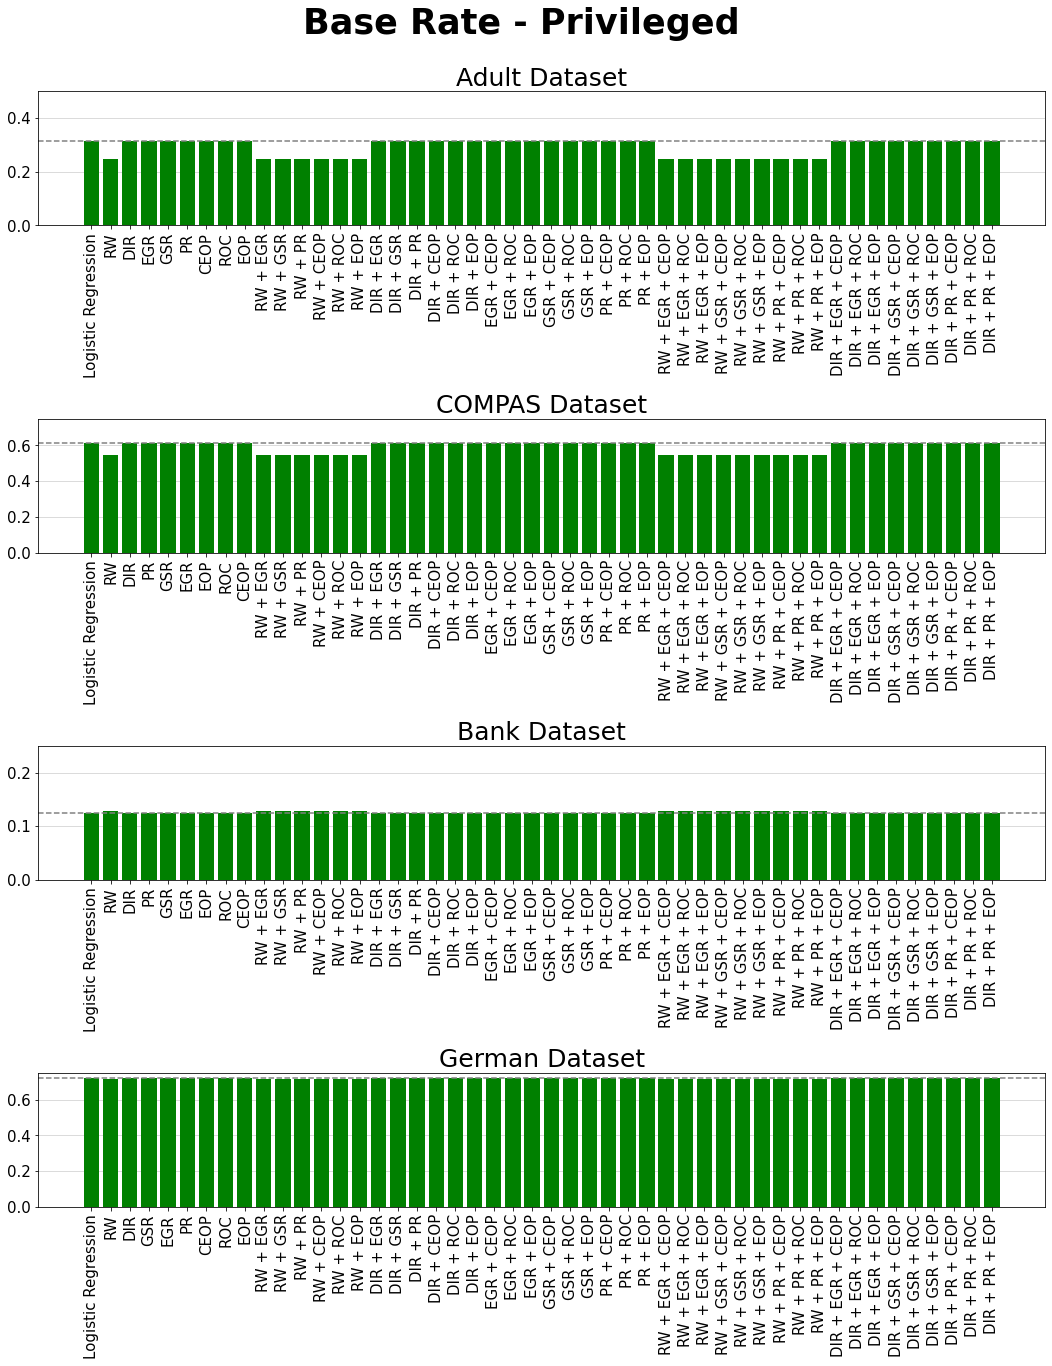

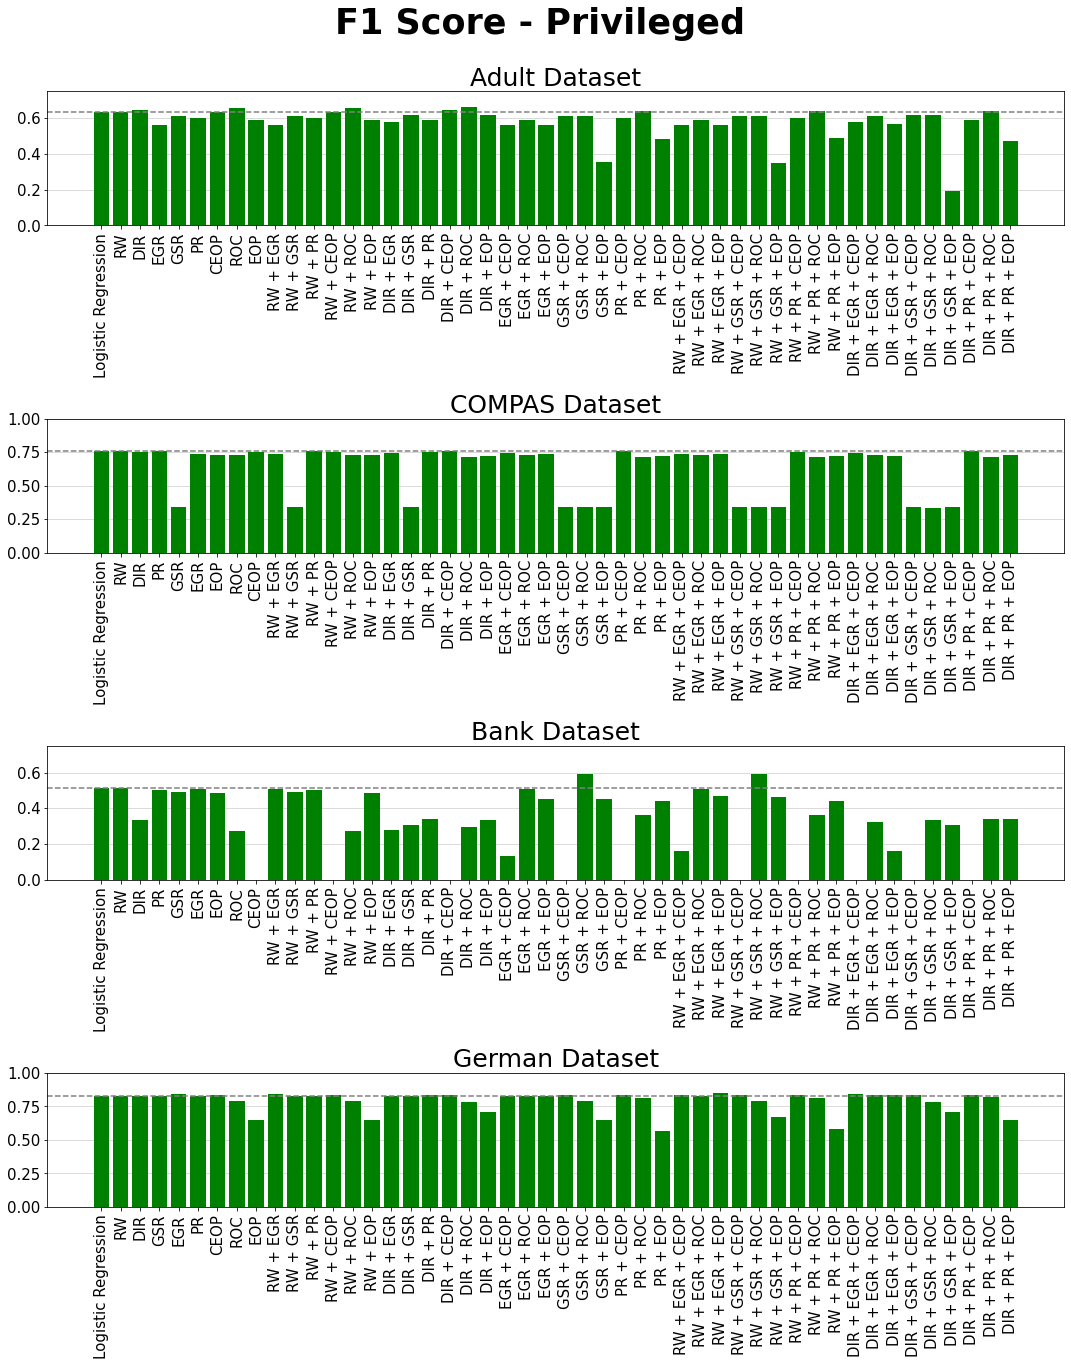

In [5]:
def create_graph(fairness_metric):
    def get_limits(max_val):
        if max_val < 0.25:
            return [0.0,0.25]
        if max_val < 0.5:
            return [0.0,0.5]
        if max_val < 0.75:
            return [0.0,0.75]
        return [0.0,1.0]
    
    fig, ax = plt.subplots(4, figsize=(15, 20))
    
    ax[0].patch.set_facecolor('white')
    ax[0].patch.set_alpha(1.0)
    ax[0].set_title("Adult Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(adult_df[fairness_metric])
    Labels=list(adult_df["Adult"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[0])
    plt.xticks(y_pos, Labels)
    #ax[0].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[0].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[0].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[0].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[0].set_ylim(get_limits(max(vals)))
    
    
    ax[1].patch.set_facecolor('white')
    ax[1].patch.set_alpha(1.0)
    ax[1].set_title("COMPAS Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(compas_df[fairness_metric])
    Labels=list(compas_df["Compas"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[1])
    plt.xticks(y_pos, Labels)
    #ax[1].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[1].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[1].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[1].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[1].set_ylim(get_limits(max(vals)))
    
    
    ax[2].patch.set_facecolor('white')
    ax[2].patch.set_alpha(1.0)
    ax[2].set_title("Bank Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(bank_df[fairness_metric])
    Labels=list(bank_df["Bank"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[2])
    plt.xticks(y_pos, Labels)
    #ax[2].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[2].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[2].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[2].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[2].set_ylim(get_limits(max(vals)))
    
    
    ax[3].patch.set_facecolor('white')
    ax[3].patch.set_alpha(1.0)
    ax[3].set_title("German Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(german_df[fairness_metric])
    Labels=list(german_df["German"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[3])
    plt.xticks(y_pos, Labels)
    #ax[3].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[3].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[3].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[3].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[3].set_ylim(get_limits(max(vals)))
        
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.yaxis.grid(color="lightgrey")
        ax.set_axisbelow(True)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.xaxis.label.set_size(20)
    fig.suptitle(fairness_metric,fontweight="bold",fontsize=35)
    fig.patch.set_alpha(1.0)
    
    plt.savefig("R3/" + fairness_metric + ".png", bbox_inches='tight', )

create_graph("False Positive Rate - Privileged")
create_graph("False Negative Rate - Privileged")
create_graph("Accuracy - Privileged")
create_graph("False Discovery Rate - Privileged")
create_graph("False Omission Rate - Privileged")
create_graph("Base Rate - Privileged")
create_graph("F1 Score - Privileged")

In [42]:
adult_base = adult_df.loc[0]
temp = adult_base < adult_base
#adult_int = pandas.DataFrame(data=[sum(temp)/len(temp)], index=['Logistic Regression'], columns=['% Improved from Logistic Regression'])
adult_int = pandas.DataFrame(columns=['% Improved from Base', 'Priv worse than Unpriv'])
#display(adult_df)
for i in adult_df.index:
    #print(adult_df.loc[i])
    temp = adult_df.loc[i] < adult_base
    f1i = list(adult_df.columns).index("F1 Score")
    temp[0], temp[f1i] = adult_df.loc[i, 'Accuracy'] > adult_base['Accuracy'], adult_df.loc[i, 'F1 Score'] > adult_base['F1 Score']
    diffs = [metric for metric in adult_df.columns if "Diff" in metric]
    privs = adult_df.loc[i, diffs] > 0
    adult_int.loc[len(adult_int.index)] = [(sum(temp)/len(temp))*100, (sum(privs)/len(privs))*100]
adult_int.index = adult_df['Adult']
adult_int

,% Improved from Base,Priv worse than Unpriv
Adult,,
Logistic Regression,0.000000,28.571429
RW,4.166667,28.571429
DIR,41.666667,28.571429
EGR,45.833333,57.142857
GSR,50.000000,28.571429
PR,41.666667,28.571429
CEOP,37.500000,28.571429
ROC,50.000000,42.857143
EOP,54.166667,57.142857


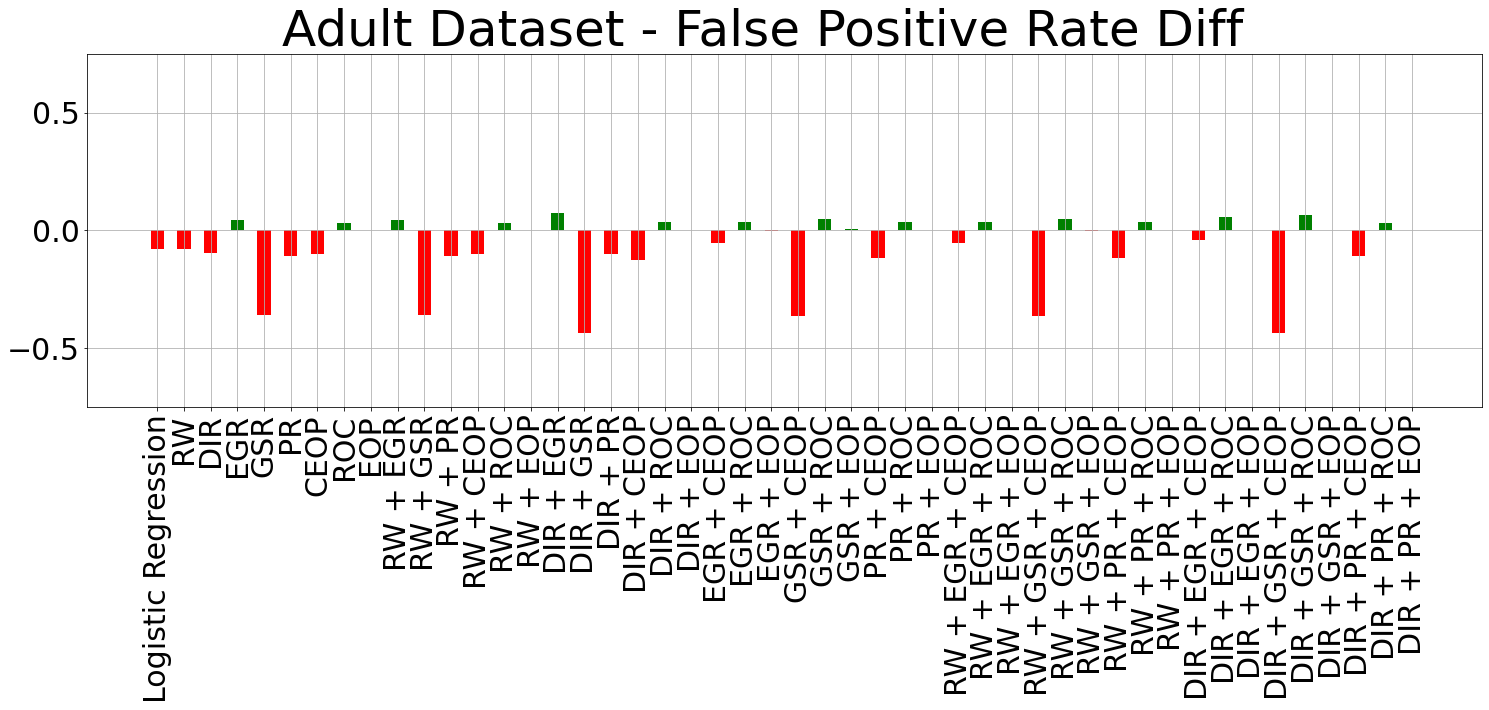

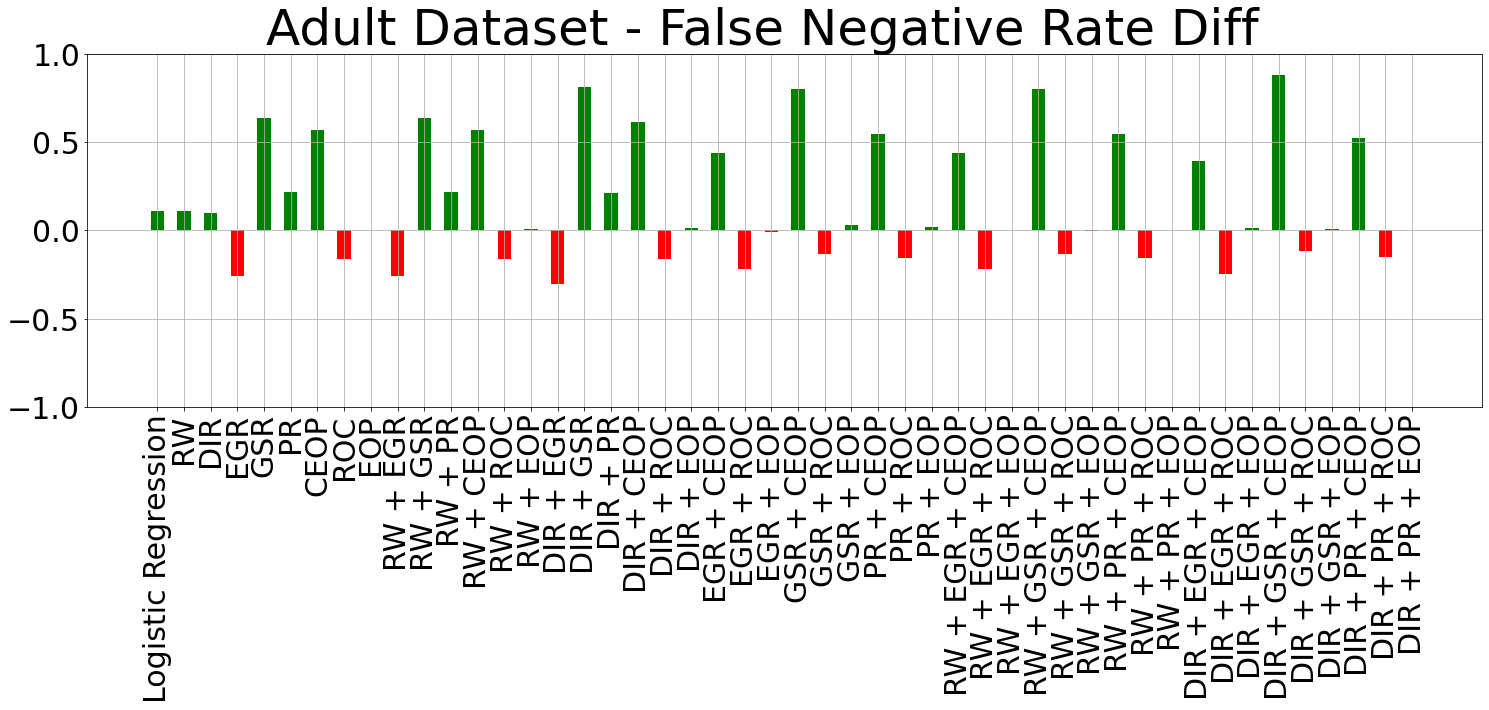

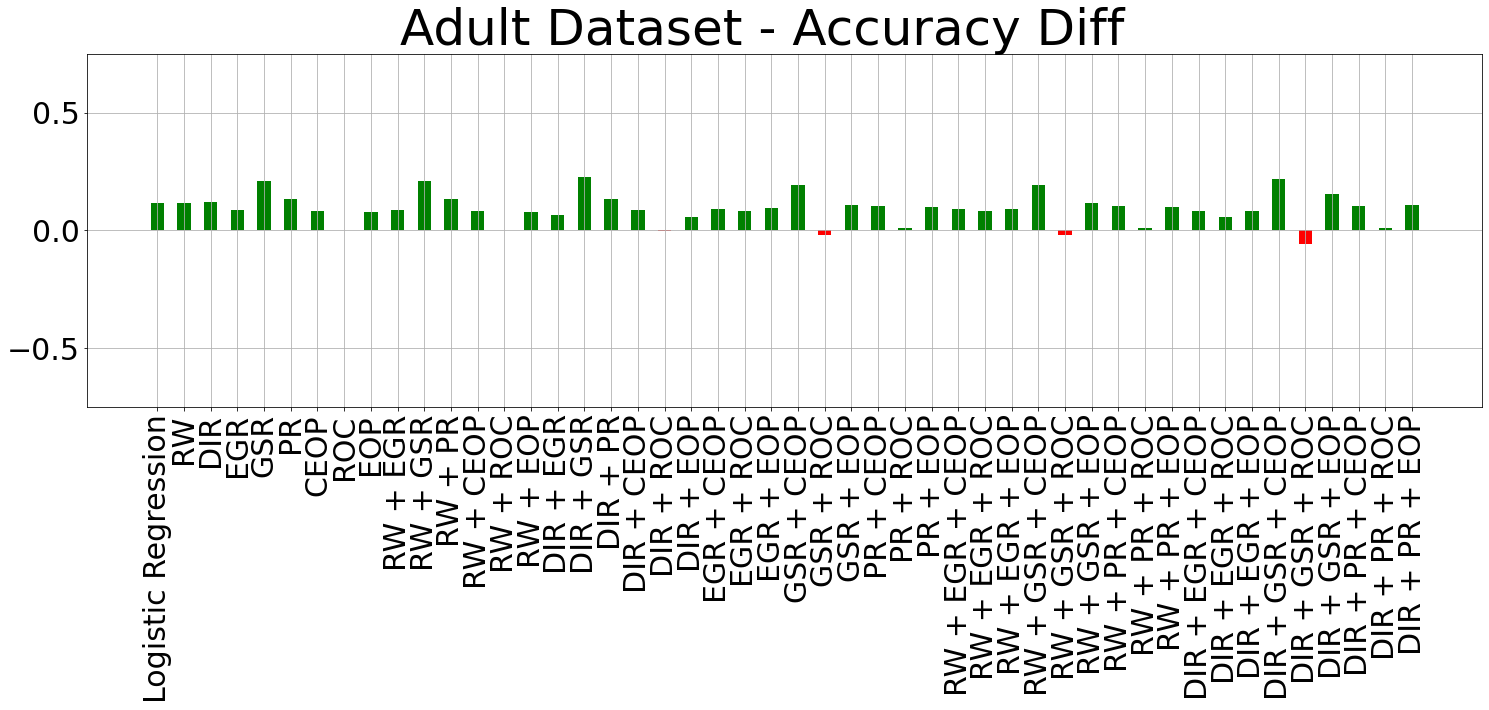

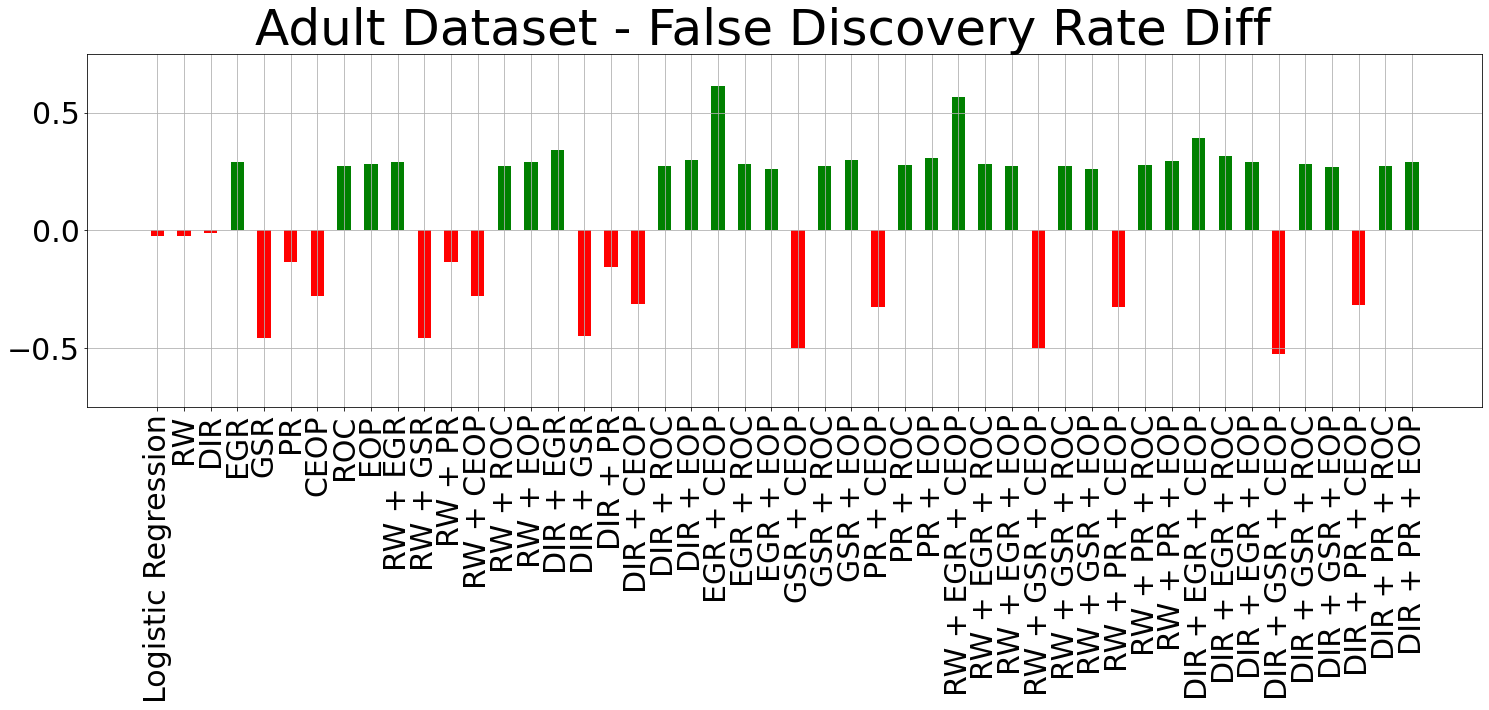

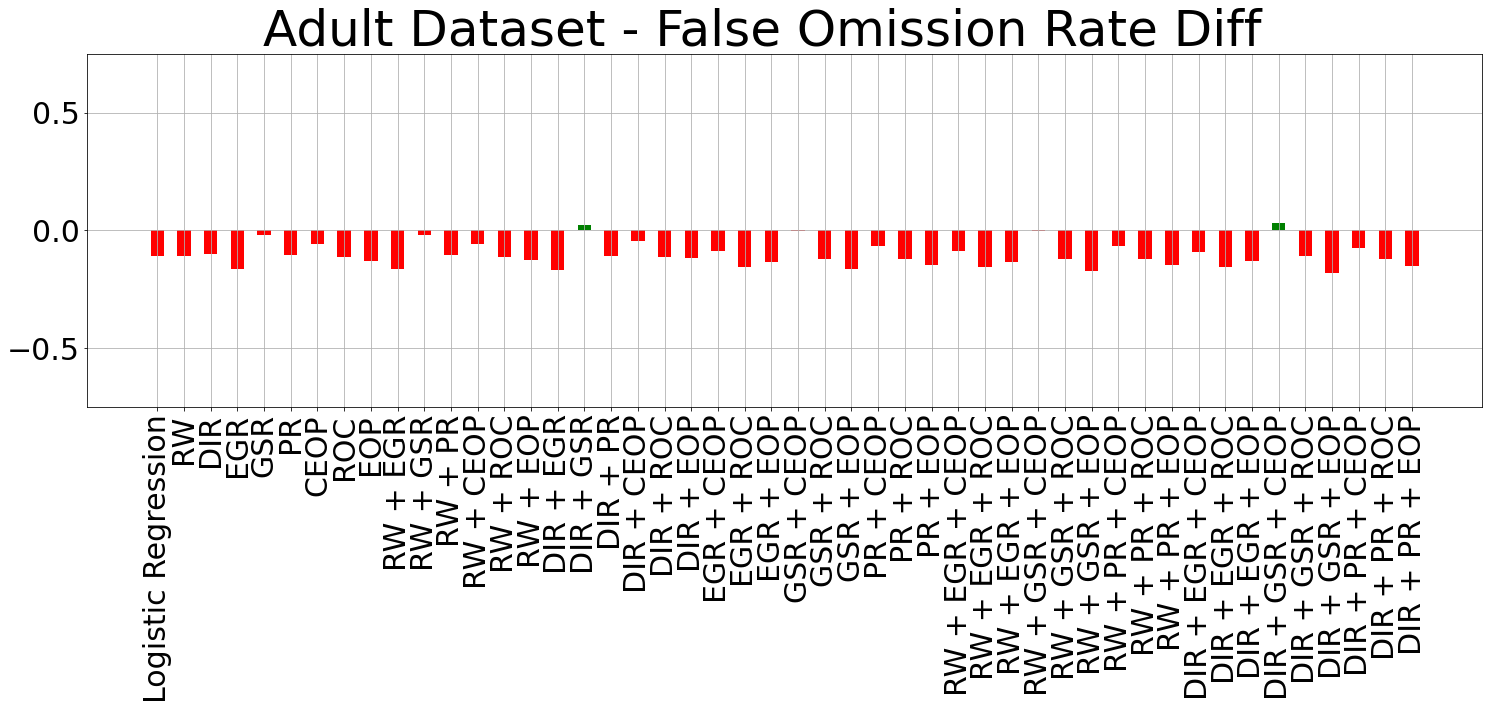

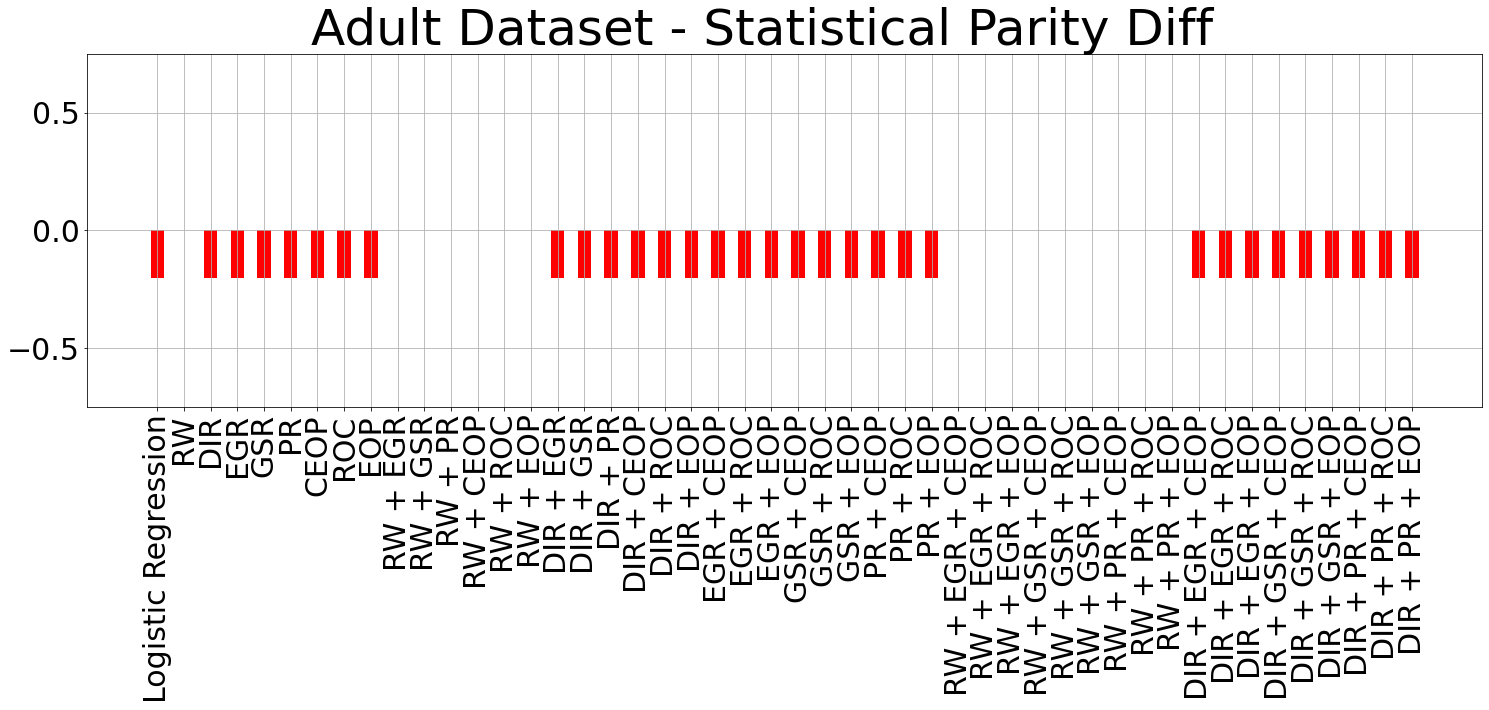

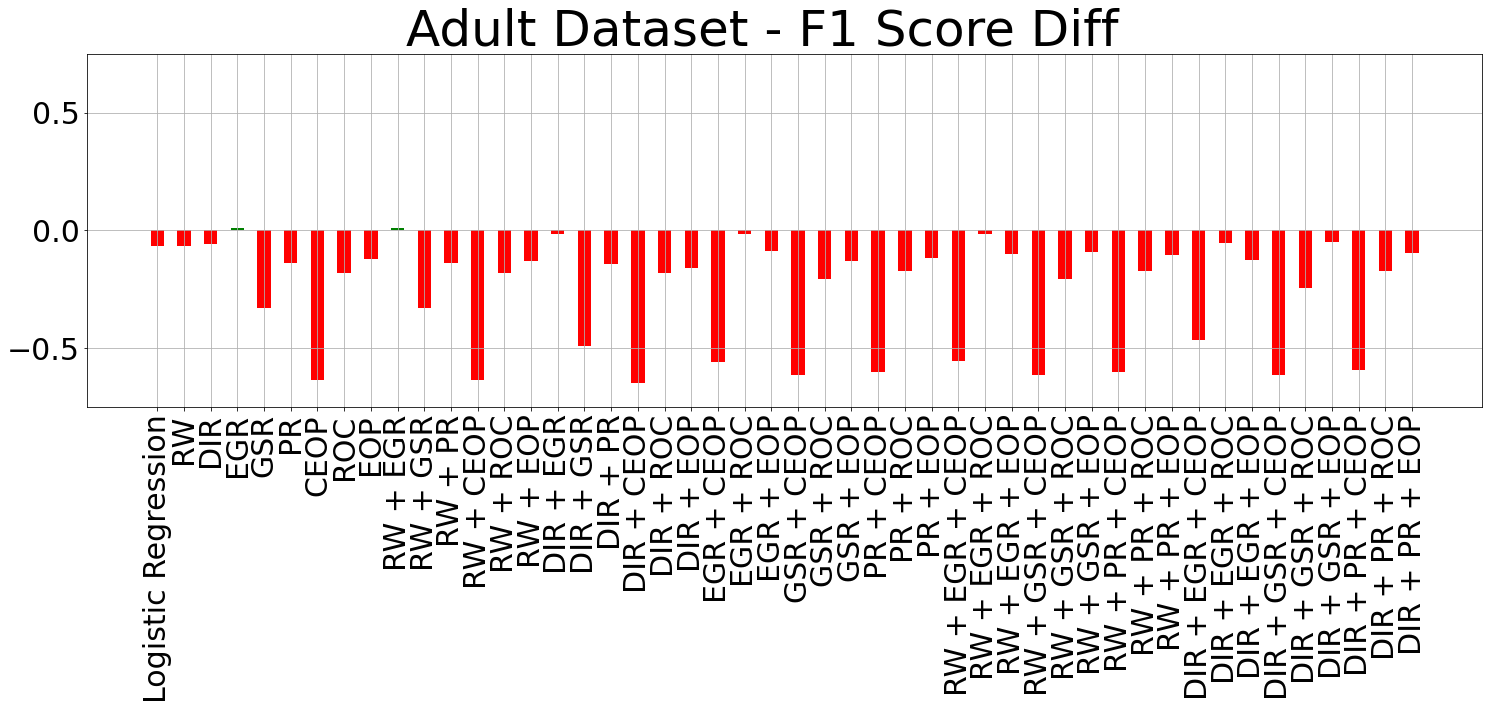

In [8]:
def create_value_graph(fairness_metric):
    colors = []
    for val in adult_df[fairness_metric]:
        if val > 0:
            colors.append('g')
        elif val < 0:
            colors.append('r')
    for val in compas_df[fairness_metric]:
        if val > 0:
            colors.append('g')
        elif val < 0:
            colors.append('r')
    for val in bank_df[fairness_metric]:
        if val > 0:
            colors.append('g')
        elif val < 0:
            colors.append('r')
    for val in german_df[fairness_metric]:
        if val > 0:
            colors.append('g')
        elif val < 0:
            colors.append('r')

    fig = plt.figure(figsize=(25,6.5))
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1.0)
    fig.suptitle("Adult Dataset - " + fairness_metric, fontsize=50)
    plt.rcParams.update({'font.size': 30})
    #plt.title("Adult Dataset - " + fairness_metric)
    y_vals = adult_df[fairness_metric]
    plt.bar(adult_df["Adult"], y_vals, 0.5, color=colors)
    if fairness_metric == "Unprivileged Base Rate" or fairness_metric == "Privileged Base Rate":
        plt.ylim([0.0, 1.0])
    else:
        if min(y_vals) > -0.25 and max(y_vals) < 0.25:
            plt.ylim([-0.25, 0.25])
        if min(y_vals) > -0.5 and max(y_vals) < 0.5:
            plt.ylim([-0.5, 0.5])
        if min(y_vals) > -0.75 and max(y_vals) < 0.75:
            plt.ylim([-0.75, 0.75])
        else:
            plt.ylim([-1.0, 1.0])
    plt.xticks(rotation=90)
    plt.grid()
    #plt.savefig("R3/Adult Dataset - " + fairness_metric + ".png", bbox_inches='tight', )
    plt.show()

create_value_graph("False Positive Rate Diff")
create_value_graph("False Negative Rate Diff")
create_value_graph("Accuracy Diff")
create_value_graph("False Discovery Rate Diff")
create_value_graph("False Omission Rate Diff")
create_value_graph("Statistical Parity Diff")
create_value_graph("F1 Score Diff")

<ipython-input-7-e057a4ebf2fb>:81: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])


FileNotFoundError: [Errno 2] No such file or directory: 'Final Charts/False Positive Rate Diff.png'

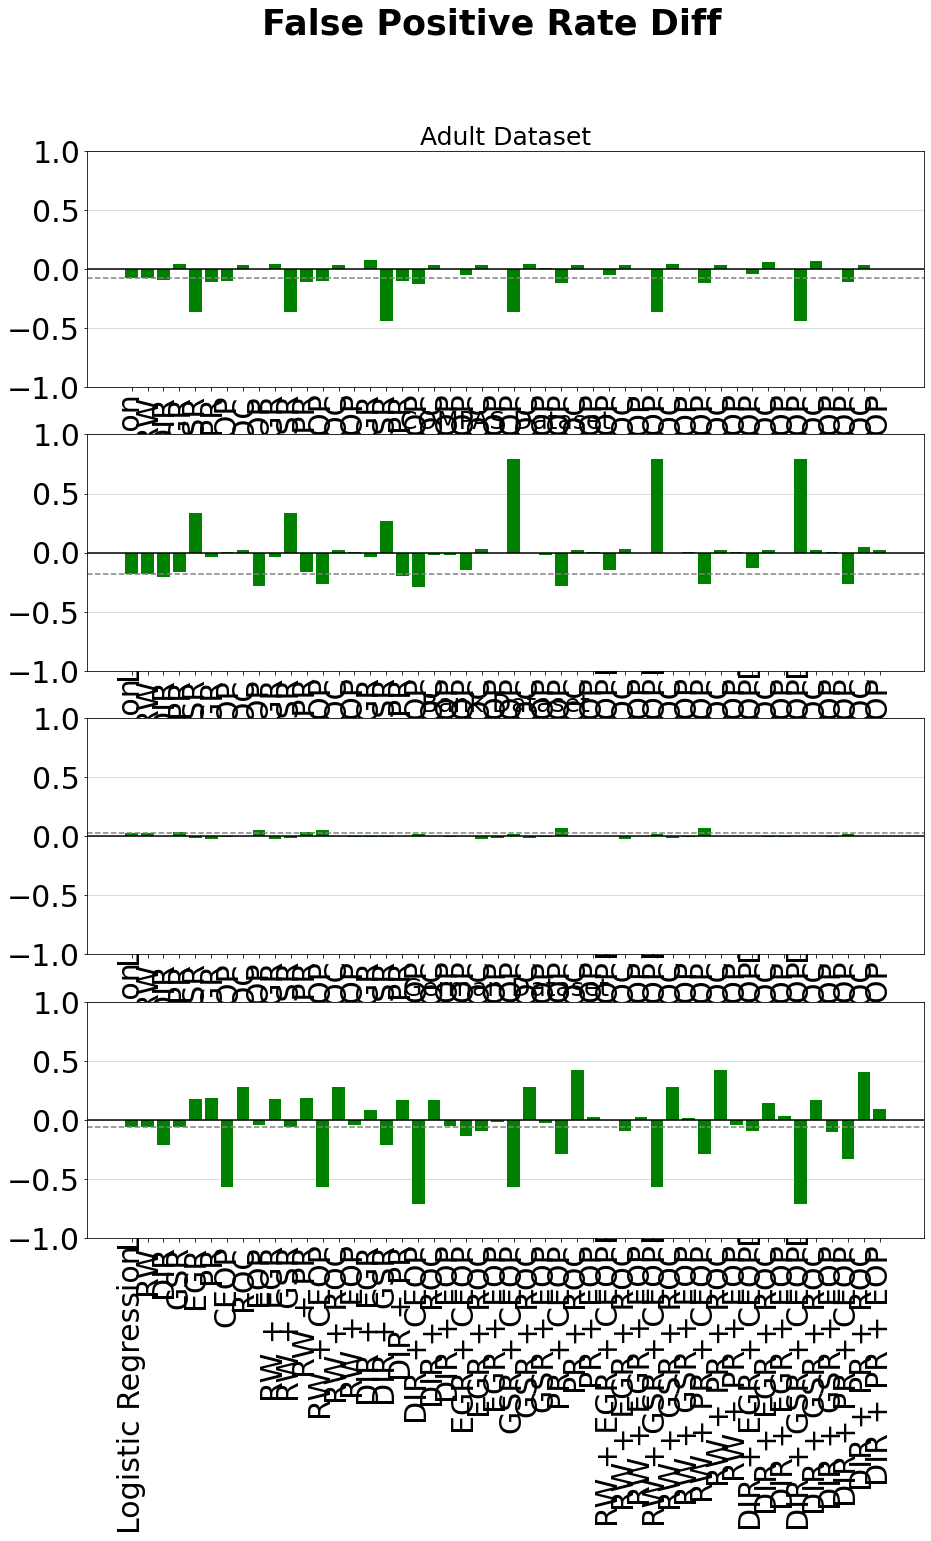

In [7]:
def create_diff_graph(fairness_metric):
    fig, ax = plt.subplots(4, figsize=(15, 20))
    
    ax[0].patch.set_facecolor('white')
    ax[0].patch.set_alpha(1.0)
    ax[0].set_title("Adult Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    ax[0].set_ylim([-1.0, 1.0])
    
    vals = list(adult_df[fairness_metric])
    Labels=list(adult_df["Adult"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[0])
    plt.xticks(y_pos, Labels)
    #ax[0].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[0].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[0].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[0].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[0].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[1].patch.set_facecolor('white')
    ax[1].patch.set_alpha(1.0)
    ax[1].set_title("COMPAS Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    ax[1].set_ylim([-1.0, 1.0])
    
    vals = list(compas_df[fairness_metric])
    Labels=list(compas_df["Compas"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[1])
    plt.xticks(y_pos, Labels)
    #ax[1].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[1].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[1].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[1].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[1].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[2].patch.set_facecolor('white')
    ax[2].patch.set_alpha(1.0)
    ax[2].set_title("Bank Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(bank_df[fairness_metric])
    Labels=list(bank_df["Bank"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[2])
    plt.xticks(y_pos, Labels)
    #ax[2].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[2].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[2].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[2].set_ylim([-1.0, 1.0])
    ax[2].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[2].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[3].patch.set_facecolor('white')
    ax[3].patch.set_alpha(1.0)
    ax[3].set_title("German Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    ax[3].set_ylim(-1.0, 1.0)
    
    vals = list(german_df[fairness_metric])
    Labels=list(german_df["German"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[3])
    plt.xticks(y_pos, Labels)
    #ax[3].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[3].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[3].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[3].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[3].axhline(y = 0, color = 'black', linestyle = 'solid')
        
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.yaxis.grid(color="lightgrey")
        ax.set_axisbelow(True)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.xaxis.label.set_size(20)
    fig.suptitle(fairness_metric,fontweight="bold",fontsize=35)
    fig.patch.set_alpha(1.0)
    
    plt.savefig("Final Charts/" + fairness_metric + ".png", bbox_inches='tight', )
    
create_diff_graph("False Positive Rate Diff")
create_diff_graph("False Negative Rate Diff")
create_diff_graph("Accuracy Diff")
create_diff_graph("False Discovery Rate Diff")
create_diff_graph("False Omission Rate Diff")
create_diff_graph("Statistical Parity Diff")
create_diff_graph("F1 Score Diff")